In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

--2020-08-19 03:15:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-19 03:15:50 (87.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len))

In [4]:
xs, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [6]:
history = model.fit(xs, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 26ms/step - loss: 6.9085 - accuracy: 0.0213
Epoch 2/100
484/484 [==============================] - 13s 26ms/step - loss: 6.4972 - accuracy: 0.0226
Epoch 3/100
484/484 [==============================] - 13s 26ms/step - loss: 6.4013 - accuracy: 0.0254
Epoch 4/100
484/484 [==============================] - 13s 26ms/step - loss: 6.2791 - accuracy: 0.0295
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1845 - accuracy: 0.0345
Epoch 6/100
484/484 [==============================] - 13s 26ms/step - loss: 6.1027 - accuracy: 0.0392
Epoch 7/100
484/484 [==============================] - 13s 26ms/step - loss: 6.0221 - accuracy: 0.0421
Epoch 8/100
484/484 [==============================] - 13s 26ms/step - loss: 5.9425 - accuracy: 0.0437
Epoch 9/100
484/484 [==============================] - 13s 26ms/step - loss: 5.8448 - accuracy: 0.0495
Epoch 10/100
484/484 [==============================] - 13s 26ms/step - l

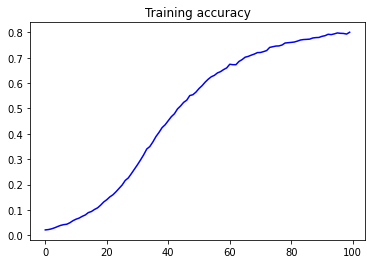

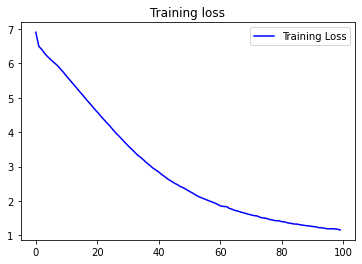

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1)
  predicted = model.predict_classes(token_list)

  for word,index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break

  seed_text += " " + output_word

print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope not trust that to call thee long go well pleasing note muse wit but not one rare free pleasure me his place praise one hate new deem'd live kind should live i dwell to glance true friend rare worth with hence made pleasure foes crime free cruel pride still young me so deem'd ' so pace small loving lie with thee old hell ' aside dead kill'd gone doth dead faith dead rent ' both pleasure foes free fill dead small pleasure sun pleasure men pride ground dwell to 'will' to crave spend grow on waste do so thought dead
